# Statistical Testing Flowchart

<img src="Statistical_Testing_Flowchart.jpg" style="width:700px;height:1000px;background-color:white">

# 0. Imports

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import statsmodels.formula.api as smf
import urllib

In [2]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/researchpy/Data-sets/master/blood_pressure.csv"
)

# 1. Parametric Assumptions

## 1.1. Independence

This assumption is checked during the setup of the study. It means that each observation is independent of another; if there are 2 or more groups being compared, then it refers to that fact that groups are mutually exclusive, i.e. each individual belongs to only 1 group; and that the data is not repeated over time.

If data is repeated measures, longitudinal/panel or time series, there are appropriate methods to account for the repeated data points from individuals. This is typically handled in the math of the statistical test that is designed to analyze this type of data.

## 1.2. Normality

### **1.2.1. Shapiro-Wilk (SW) Test**

The null hypothesis is that the data is normal. The Shapiro-Wilk test is an omnibus test (D'Agostino, 1971). It evaluates normality by comparing the data's distribution (values ordered) to the hypothesized normal distribution (Shapiro & Wilk, 1965). This can be completed in Python by using the `shapiro()` method from `scipy.stats`.

In [3]:
# Coming from independent t-test framework

sampling_difference = (
    df["bp_after"][df["sex"] == "Male"].values
    - df["bp_after"][df["sex"] == "Female"].values
)

stats.shapiro(sampling_difference)

ShapiroResult(statistic=0.9858611226081848, pvalue=0.7147841453552246)

In [4]:
# From regression or ANOVA framework

model = smf.ols("bp_after ~ C(sex) + C(agegrp)", data=df).fit()

stats.shapiro(model.resid)

ShapiroResult(statistic=0.9816308617591858, pvalue=0.10094080120325089)

### 1.2.2. D'Agostino-Pearson K2 Test

The null hypothesis is that the data is normal. The D'Agostino-Pearson test is an omnibus test and evaluates normality by assessing the skewness and kurtosis (D'Agostino, 1971).

In [5]:
# Coming from independent t-test framework

sampling_difference = (
    df["bp_after"][df["sex"] == "Male"].values
    - df["bp_after"][df["sex"] == "Female"].values
)

stats.normaltest(sampling_difference)

NormaltestResult(statistic=0.003175119018886905, pvalue=0.9984136999965528)

In [6]:
# From regression or ANOVA framework

model = smf.ols("bp_after ~ C(sex) + C(agegrp)", data=df).fit()

stats.normaltest(model.resid)

NormaltestResult(statistic=2.962603751831582, pvalue=0.22734152518547723)

### 1.2.3. Kolmogorov-Smirnov (KS) Test

The null hypothesis is that the data is normal (matches compared distribution). The Kolmogorov-Smirnov test is a distance test (D'Agostino, 1971). It evaluates normality by comparing the data's empirical distribution function to the expected cumulative distribution function of the comparison distribution (Öztuna D., Elhan A., & Tüccar, 2006).

If testing the difference between two groups, then this can be completed using the `ks_2samp()` method from `scipy.stats`.

In [7]:
stats.ks_2samp(
    df["bp_after"][df["sex"] == "Male"], df["bp_after"][df["sex"] == "Female"]
)

KstestResult(statistic=0.36666666666666664, pvalue=0.0005569710611454617)

If coming from a regression or ANOVA approach then the 1 sample version of the test can be ran on the residuals using the `kstest()` method from `scipy.stats`.

In [8]:
model = smf.ols("bp_after ~ C(sex) + C(agegrp)", data=df).fit()

stats.kstest(model.resid, "norm")

KstestResult(statistic=0.45021797084392334, pvalue=1.0174625716706997e-22)

### 1.2.4. Anderson-Darling

The null hypothesis is that the data is normal (matches compared distribution). The Anderson-Darling test assess normality by comparing the data's empirical distribution function to a specified distribution's cumulative distribution function (Stephen, 1974). This can be completed using the `anderson()` method from `scipy.stats`.

A note about this method, it returns 3 parts: the test statistic, an array of significance levels, and an array of corresponding critical values. The test statistic needs to be compared to the critical value for the significance level of interest- this is most commonly set to 0.05.

In [9]:
# Coming from mean comparison framework (independent sample t-test)

sampling_difference = (
    df["bp_after"][df["sex"] == "Male"].values
    - df["bp_after"][df["sex"] == "Female"].values
)

result = stats.anderson(sampling_difference)

In [10]:
print(f"Test statistic: {result.statistic: .4f}")

for i in range(len(result.critical_values)):
    sig, crit = result.significance_level[i], result.critical_values[i]

    if result.statistic < result.critical_values[i]:
        print(
            f"At {sig}% significance,{result.statistic: .4f} <{result.critical_values[i]: .4f} data looks normal (fail to reject H0)"
        )
    else:
        print(
            f"At {sig}% significance,{result.statistic: .4f} >{result.critical_values[i]: .4f} data does not look normal (reject H0)"
        )

Test statistic:  0.2987
At 15.0% significance, 0.2987 < 0.5440 data looks normal (fail to reject H0)
At 10.0% significance, 0.2987 < 0.6190 data looks normal (fail to reject H0)
At 5.0% significance, 0.2987 < 0.7430 data looks normal (fail to reject H0)
At 2.5% significance, 0.2987 < 0.8660 data looks normal (fail to reject H0)
At 1.0% significance, 0.2987 < 1.0300 data looks normal (fail to reject H0)


In [11]:
# From regression or ANOVA framework

model = smf.ols("bp_after ~ C(sex) + C(agegrp)", data=df).fit()

result = stats.anderson(model.resid)

In [12]:
print(f"Test statistic: {result.statistic: .4f}")
for i in range(len(result.critical_values)):
    sig, crit = result.significance_level[i], result.critical_values[i]

    if result.statistic < result.critical_values[i]:
        print(
            f"At {sig}% significance,{result.statistic: .4f} <{result.critical_values[i]: .4f} data looks normal (fail to reject H0)"
        )
    else:
        print(
            f"At {sig}% significance,{result.statistic: .4f} >{result.critical_values[i]: .4f} data does not look normal (reject H0)"
        )

Test statistic:  0.4467
At 15.0% significance, 0.4467 < 0.5580 data looks normal (fail to reject H0)
At 10.0% significance, 0.4467 < 0.6360 data looks normal (fail to reject H0)
At 5.0% significance, 0.4467 < 0.7630 data looks normal (fail to reject H0)
At 2.5% significance, 0.4467 < 0.8900 data looks normal (fail to reject H0)
At 1.0% significance, 0.4467 < 1.0590 data looks normal (fail to reject H0)


### 1.2.5. Q-Q Plot

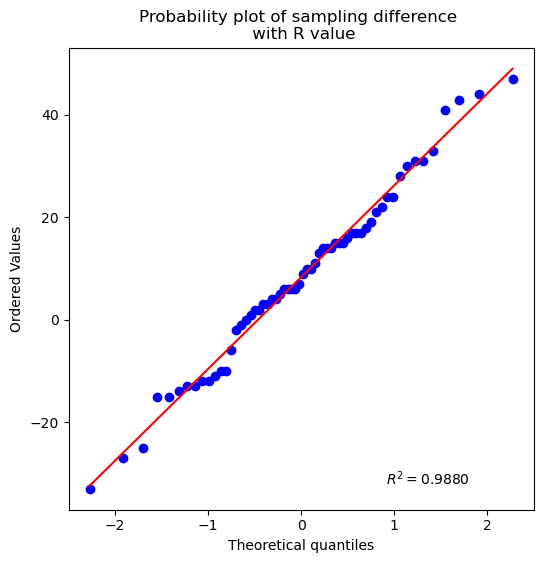

In [13]:
sampling_difference = (
    df["bp_after"][df["sex"] == "Male"].values
    - df["bp_after"][df["sex"] == "Female"].values
)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(sampling_difference, plot=plt, rvalue=True)
ax.set_title("Probability plot of sampling difference \n with R value")
ax.set

plt.show()

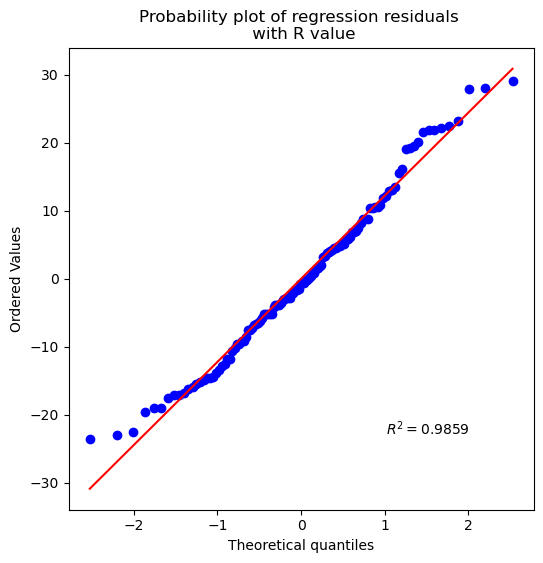

In [14]:
# From regression or ANOVA framework

model = smf.ols("bp_after ~ C(sex) + C(agegrp)", data=df).fit()

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(model.resid, plot=plt, rvalue=True)
ax.set_title("Probability plot of regression residuals \n with R value")
ax.set

plt.show()

## 1.3. Homogeneity of Variances

### 1.3.1. Barlett's Test

Barlett's test is used to test if the groups, which can be referred to as k, have equal variances. Barlett's test can test for equality between 2 or more groups.

This can be done with the `bartlet()` method from `scipy.stats`.

In [15]:
stats.bartlett(
    df["bp_after"][df["sex"] == "Male"], df["bp_after"][df["sex"] == "Female"]
)

BartlettResult(statistic=3.9379638422812793, pvalue=0.047207884641474476)

### **1.3.2. Levene's Test**

Levene's test tests if the different goups have equal variances (Levene, 1960). Levene's test is less sensitive than Barlett's test to departures from normality and power (Conover, 1981). Levene's test of homogeneity of variances can test for equality between 2 or more groups. The original suggestion was to use the mean, Brown and Forsythe (1974) provided an expansion and testing can also be calculated using the median or the trimmed mean which have been found to be robust under nonnormality.

This can be done with the `levene()` method from `scipy.stats`.

In [16]:
# Using the mean

stats.levene(df["bp_after"][df["sex"] == "Male"], df["bp_after"][df["sex"] == "Female"])

LeveneResult(statistic=5.0464151793144625, pvalue=0.026537264851214513)

In [17]:
# Using the median

stats.levene(
    df["bp_after"][df["sex"] == "Male"],
    df["bp_after"][df["sex"] == "Female"],
    center="median",
)

LeveneResult(statistic=5.0464151793144625, pvalue=0.026537264851214513)

In [18]:
# Using the trimmed mean (Default is to cut 10% total - 5% from each tail)

stats.levene(
    df["bp_after"][df["sex"] == "Male"],
    df["bp_after"][df["sex"] == "Female"],
    center="trimmed",
)

LeveneResult(statistic=7.769755793226307, pvalue=0.006297605035462623)

# 2. Tests for Continuous Data

## 2.1. Z-Test

In [19]:
from statsmodels.stats.weightstats import ztest

In [20]:
# One-Sample Z-Test

# enter IQ levels for 20 patients
data = [
    88, 92, 94, 94, 96, 97, 97, 97, 99, 99, 105, 
    109, 109, 109, 110, 112, 112, 113, 114, 115
]

# perform one sample z-test
ztest(data, value=100)

(1.5976240527147705, 0.1101266701438426)

In [21]:
# Two-Sample Z-Test

# enter IQ levels for 20 individuals from each city
cityA = [
    82, 84, 85, 89, 91, 91, 92, 94, 99, 99, 105, 109, 
    109, 109, 110, 112, 112, 113, 114, 114
]

cityB = [
    90, 91, 91, 91, 95, 95, 99, 99, 108, 109, 109, 114, 
    115, 116, 117, 117, 128, 129, 130, 133
]

# perform two sample z-test
ztest(cityA, cityB, value=0)

(-1.9953236073282115, 0.046007596761332065)

## 2.2. Proportion Z-Test

In [22]:
from statsmodels.stats.proportion import proportions_ztest

In [23]:
# One Sample Proportiona Z-Test

count = 5
nobs = 83
value = .05
proportions_ztest(count, nobs, value)

(0.3921260263140161, 0.6949650981148476)

In [24]:
# Two Samples Proportiona Z-Test

count = np.array([5, 12])
nobs = np.array([83, 99])
proportions_ztest(count, nobs)

(-1.4078304151258787, 0.15918129181156992)

## 2.3. Student's T-Test

In [25]:
x1 = stats.norm.rvs(loc=5, scale=10, size=500)
x2 = stats.norm.rvs(loc=5, scale=10, size=500)

In [26]:
stats.ttest_ind(
    x1, x2, 
    axis=0,
    equal_var=True, # standard deviation of the samples is assumed to be the same
    nan_policy='propagate', 
    permutations=None, 
    random_state=None, 
    alternative='two-sided'
)

Ttest_indResult(statistic=-2.819023679746116, pvalue=0.004912261967697262)

## 2.4. Welch's T-Test

In [27]:
stats.ttest_ind(
    x1, x2, 
    axis=0,
    equal_var=False, # perform Welch's T-Test
    nan_policy='propagate', 
    permutations=None, 
    random_state=None, 
    alternative='two-sided'
)

Ttest_indResult(statistic=-2.819023679746116, pvalue=0.00491226320811394)

## 2.5. Wilcoxon Signed Rank Test

In [28]:
# One Sample

x = [6, 8, 14, 16, 23, 24, 28, 29, 41, -48, 49, 56, 60, -67, 75]

stats.wilcoxon(
    x, 
    y=None, 
    zero_method='wilcox', 
    correction=False, 
    alternative='two-sided', 
    method='auto', 
    axis=0, 
    nan_policy='propagate', 
    keepdims=False
)

WilcoxonResult(statistic=24.0, pvalue=0.041259765625)

In [29]:
# Two Samples

x = np.array([0.5, 0.825, 0.375, 0.5])
y = np.array([0.525, 0.775, 0.325, 0.55])
stats.wilcoxon(x, y, alternative='greater')

WilcoxonResult(statistic=5.0, pvalue=0.5625)

## 2.6. Mann-Whitney U Test

In [30]:
group1 = [20, 23, 21, 25, 18, 17, 18, 24, 20, 24, 23, 19]
group2 = [24, 25, 21, 22, 23, 18, 17, 28, 24, 27, 21, 23]

In [31]:
stats.mannwhitneyu(group1, group2, alternative='two-sided')

MannwhitneyuResult(statistic=50.0, pvalue=0.21138945901258455)

## 2.7. ANOVA

In [32]:
from statsmodels.stats.anova import anova_lm

### 2.7.1. One-Way ANOVA

In [33]:
# Data Preparation

url = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/altman_910.txt'
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')

# Sort them into groups, according to column 1
group1 = data[data[:, 1] == 1, 0]
group2 = data[data[:, 1] == 2, 0]
group3 = data[data[:, 1] == 3, 0]

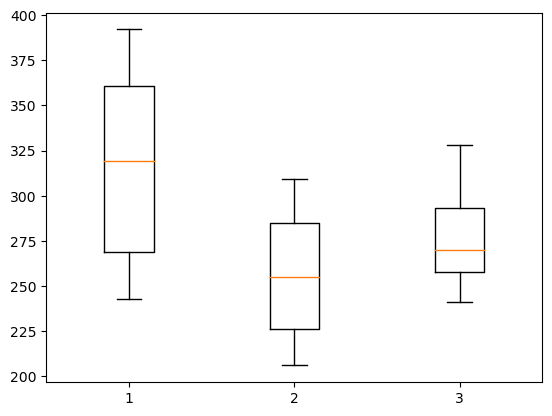

In [34]:
# matplotlib plotting
plot_data = [group1, group2, group3]
ax = plt.boxplot(plot_data)
plt.show()

In [35]:
stats.f_oneway(group1, group2, group3)

F_onewayResult(statistic=3.7113359882669763, pvalue=0.043589334959178244)

In [36]:
df = pd.DataFrame(data, columns=['value', 'treatment'])

# the "C" indicates categorical data
model = smf.ols('value ~ C(treatment)', df).fit()

print(anova_lm(model))

                df        sum_sq      mean_sq         F    PR(>F)
C(treatment)   2.0  15515.766414  7757.883207  3.711336  0.043589
Residual      19.0  39716.097222  2090.320906       NaN       NaN


### 2.7.2. Two-Way ANOVA

In [37]:
# Data Preparation

data = pd.read_csv("data/data_for_two_way_anova.csv", names=['head_size', 'fetus', 'observer'])

<AxesSubplot: title={'center': 'head_size'}, xlabel='fetus'>

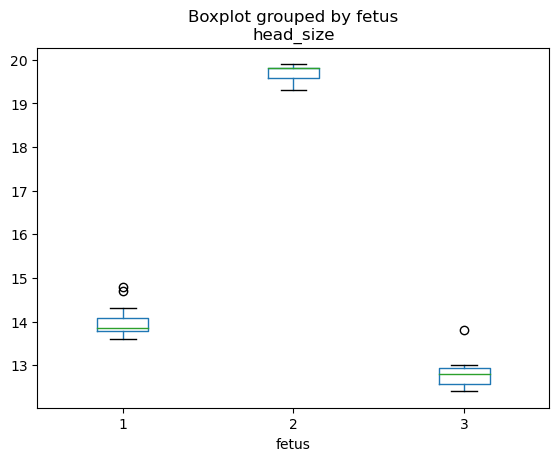

In [38]:
data.boxplot(column='head_size', by='fetus', grid=False)

In [39]:
formula = 'head_size ~ C(fetus) + C(observer) + C(fetus):C(observer)'
lm = smf.ols(formula, data).fit()
print(anova_lm(lm))

                        df      sum_sq     mean_sq            F        PR(>F)
C(fetus)               2.0  324.008889  162.004444  2113.101449  1.051039e-27
C(observer)            3.0    1.198611    0.399537     5.211353  6.497055e-03
C(fetus):C(observer)   6.0    0.562222    0.093704     1.222222  3.295509e-01
Residual              24.0    1.840000    0.076667          NaN           NaN


### 2.7.3. Post-Hoc Analysis

- Tukey's HSD (Honest Significant Difference) test.
- Duncan’s new multiple range test (MRT)
- Scheffé’s Method

Sensitivity: Scheffe < Turkey < Duncan

Usage: Turkey for Natural Science, Duncan for Social Science and Psychological Survey

#### 2.7.3.1. For One-Way ANOVA

In [40]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [41]:
# Data Preparation

url = 'https://raw.githubusercontent.com/thomas-haslwanter/statsintro_python/master/ipynb/Data/data_altman/altman_910.txt'
data = np.genfromtxt(urllib.request.urlopen(url), delimiter=',')

# Sort them into groups, according to column 1
group1 = data[data[:, 1] == 1, 0]
group2 = data[data[:, 1] == 2, 0]
group3 = data[data[:, 1] == 3, 0]

In [42]:
df = pd.DataFrame(data,columns=['value', 'treatment']).set_index('treatment')

In [43]:
df2 = df.reset_index()
df2.head()

,treatment,value
0,1.0,243.0
1,1.0,251.0
2,1.0,275.0
3,1.0,291.0
4,1.0,347.0


In [44]:
posthoc = pairwise_tukeyhsd(df2['value'], df2['treatment'], alpha=0.05)
print(posthoc)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2 meandiff p-adj    lower    upper  reject
------------------------------------------------------
   1.0    2.0 -60.1806 0.0355  -116.619 -3.7421   True
   1.0    3.0  -38.625 0.3215 -104.8404 27.5904  False
   2.0    3.0  21.5556 0.6802  -43.2295 86.3406  False
------------------------------------------------------


#### 2.7.3.2. For Two-Way ANOVA

In [45]:
# Data Preparation

data = pd.read_csv("data/data_for_two_way_anova.csv", names=['head_size', 'fetus', 'observer'])

In [46]:
data.head()

,head_size,fetus,observer
0,14.3,1,1
1,14.0,1,1
2,14.8,1,1
3,13.6,1,2
4,13.6,1,2


In [47]:
posthoc = pairwise_tukeyhsd(data['head_size'], data['fetus'], alpha=0.05)
print(posthoc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower   upper  reject
---------------------------------------------------
     1      2      5.7   0.0  5.3691  6.0309   True
     1      3  -1.1667   0.0 -1.4976 -0.8358   True
     2      3  -6.8667   0.0 -7.1976 -6.5358   True
---------------------------------------------------


In [48]:
posthoc = pairwise_tukeyhsd(data['head_size'], data['observer'], alpha=0.05)
print(posthoc)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
     1      2  -0.3778 0.9943 -4.4569 3.7014  False
     1      3  -0.3111 0.9968 -4.3902  3.768  False
     1      4   0.0333    1.0 -4.0458 4.1125  False
     2      3   0.0667    1.0 -4.0125 4.1458  False
     2      4   0.4111 0.9927  -3.668 4.4902  False
     3      4   0.3444 0.9957 -3.7347 4.4236  False
---------------------------------------------------


## 2.8. Friedman's Test

In [49]:
# Data Preparation

group1 = [4, 6, 3, 4, 3, 2, 2, 7, 6, 5]
group2 = [5, 6, 8, 7, 7, 8, 4, 6, 4, 5]
group3 = [2, 4, 4, 3, 2, 2, 1, 4, 3, 2]

In [50]:
stats.friedmanchisquare(group1, group2, group3)

FriedmanchisquareResult(statistic=13.351351351351344, pvalue=0.0012612201221243594)

## 2.9. Kruskal-Wallis Test

In [51]:
# Data Preparation

data_group1 = [7, 9, 12, 15, 21]
data_group2 = [5, 8, 14, 13, 25]
data_group3 = [6, 8, 8, 9, 5]

In [52]:
stats.kruskal(data_group1, data_group2, data_group3)

KruskalResult(statistic=3.492418772563175, pvalue=0.17443390338074047)

# 3. Tests for Categorical Data

## 3.1. McNemar's Chi Square Test

Statistical method for comparing proportions from two dependent populations

- It is a type of paired chi-square test (χ2), but this time, both populations are dependent.

- Only used for paired nominal data.

1. Before-after comparison data, to uncover any changes in perception, attitude, behavior in marketing campaigns, drug testing, etc.
2. Matched pair case-control:
(i) Each case has a matching control, i.e., matched on age, gender, race, etc.
(ii) Twins studies, i.e., the matched pairs are twins.

In [53]:
from statsmodels.stats.contingency_tables import mcnemar

In [54]:
# Data Preparation

data = [['Toyota', 'Toyota'] for i in range(55)] + \
       [['Toyota', 'Mitsubishi'] for i in range(5)] + \
       [['Mitsubishi', 'Toyota'] for i in range(15)] + \
       [['Mitsubishi', 'Mitsubishi'] for i in range(25)]
df = pd.DataFrame(
    data, 
    columns=['Before Ad Screening', 'After Ad Screening']
)

In [55]:
# create contingency table
data_crosstab = pd.crosstab(
    df['Before Ad Screening'],
    df['After Ad Screening'],
    # margins=True, 
    # margins_name="Total"
)

In [56]:
data_crosstab

After Ad Screening,Mitsubishi,Toyota
Before Ad Screening,,
Mitsubishi,25,15
Toyota,5,55


Syntax:

`mcnemar(table, exact=True, correction=True)`

Parameters:
- `table`: It represents the square contingency table
- `exact = True`: The binomial distribution will be used.
- `exact = False`: The Chi-Square distribution will be used
- `correction = True`: Then the continuity correction would be used. As a rule. this correction would be applied any cell counts in the table is not more than 4

In [57]:
# McNemar's Test with the continuity correction
print(mcnemar(
    data_crosstab, 
    exact=False, 
    correction=True,
))

pvalue      0.04417134490844271
statistic   4.05


In [58]:
# McNemar's Test without any continuity correction
print(mcnemar(
    data_crosstab, 
    exact=False, 
    correction=False
))

pvalue      0.025347318677468325
statistic   5.0


## 3.2. Cochran's Q Test

In [59]:
from statsmodels.stats.contingency_tables import cochrans_q

In [60]:
# Data Preparation
Student = list(range(1, 21))
Tech_A = [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0]
Tech_B = [1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1]
Tech_C = [0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1]

df = pd.DataFrame(
    {
        "Student": Student, 
        "Technique_A": Tech_A,
        "Technique_B": Tech_B,
        "Technique_C": Tech_C
    }
).set_index("Student")

In [61]:
df.head()

,Technique_A,Technique_B,Technique_C
Student,,,
1,1,1,0
2,1,0,0
3,1,1,1
4,1,1,0
5,1,0,1


In [62]:
print(cochrans_q(df))

df          2
pvalue      0.8464817248906141
statistic   0.3333333333333333


## 3.3. Chi-Squared Goodness-of-Fit

- null hypothesis:  A variable has a predetermined distribution.

- Alternative hypotheses: A variable deviates from the expected distribution.

Syntax: `stats.chisquare(f_obs, f_exp)`

parameters:
- `f_obs` : this parameter contains an array of observed values.
- `f_exp` : this parameter contains an array of expected values.

In [63]:
# no of hours a student studies
# in a week vs expected no of hours
observed_data = (np.array([18, 16, 20, 17, 18, 21, 19]) / 129 * 59).tolist()  # / 129 * 59 to calculate proportion
expected_data = [9, 8, 11, 8, 10, 7, 6]

In [64]:
stats.chisquare(observed_data, expected_data)

Power_divergenceResult(statistic=2.9294819931785874, pvalue=0.8176441528530437)

In [65]:
# find Chi-Square critical value
print(stats.chi2.ppf(1-0.05, df=6))

12.591587243743977


## 3.4. 2x2 Chi-squared Test

In [66]:
# Data Preparation
# For example,    before            after
observed = [[20, 10, 40, 30], [44, 6, 22, 28]]

In [67]:
stats.chi2_contingency(observed)

(15.294771968854281,
 0.0015813113058002915,
 3,
 array([[32.,  8., 31., 29.],
        [32.,  8., 31., 29.]]))

In [68]:
# Two-sample chi-square test
result = stats.chi2_contingency(observed)

# p-value
print(result[1])

0.0015813113058002915
